In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')

In [3]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


# POPULATION MEAN OF MALE AND FEMALE AGES

In [4]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [5]:
df[df['Gender']=='Male']['Age'].mean()

36.86734693877551

In [6]:
df[df['Gender']=='Female']['Age'].mean()

38.411764705882355

# POPULATION OF VARIANCE OF AGES OF MALE AND FEMALE

In [7]:
df[df['Gender']=='Male']['Age'].var()

100.87462061747776

In [8]:
df[df['Gender']=='Female']['Age'].var()

117.9182845552014

**PROPORTION OF MALE WHO PURCHASE THE ADS**

In [9]:
P1_Male=len(df[df['Gender']=='Male'][df['Purchased']==1])/len(df[df['Gender']=='Male'])*100

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_11884\944477796.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  P1_Male=len(df[df['Gender']=='Male'][df['Purchased']==1])/len(df[df['Gender']=='Male'])*100


In [10]:
print(f"Male Who Purchased the Ad P1={P1_Male}")

Male Who Purchased the Ad P1=33.6734693877551


**PROPORTION OF MALE WHO DOES NOT PURCHASE THE ADS**

In [11]:
print(f"Male Who does not purchase the ad: Q1={100-P1_Male}")

Male Who does not purchase the ad: Q1=66.32653061224491


**PROPORTION OF FEMALE PURCHASE THE ADS**

In [12]:
P1_Female=len(df[df['Gender']=='Female'][df['Purchased']==1])/len(df[df['Gender']=='Female'])*100

C:\Users\Taimoor\AppData\Local\Temp\ipykernel_11884\3222681887.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  P1_Female=len(df[df['Gender']=='Female'][df['Purchased']==1])/len(df[df['Gender']=='Female'])*100


In [13]:
print(f"Female Who Purchased the Ad P1={P1_Female}")

Female Who Purchased the Ad P1=37.745098039215684


**PROPORTION OF FEMALE WHO DOES NOT PURCHASE THE ADS**

In [14]:
print(f"Female Who does not purchase the ad: Q1={100-P1_Female}")

Female Who does not purchase the ad: Q1=62.254901960784316


<AxesSubplot:xlabel='Purchased', ylabel='Density'>

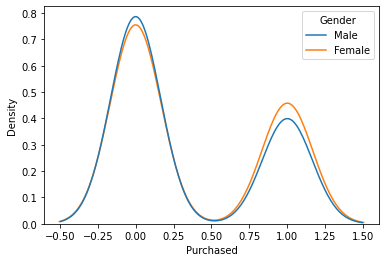

In [15]:
sns.kdeplot(df['Purchased'],hue=df['Gender'])

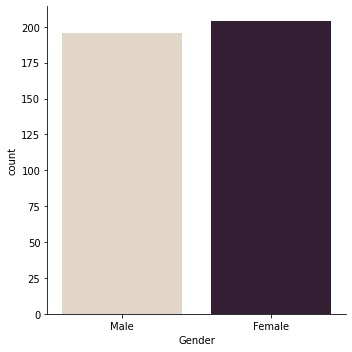

In [16]:
sns.catplot(data=df, x="Gender",kind="count", palette="ch:.25")

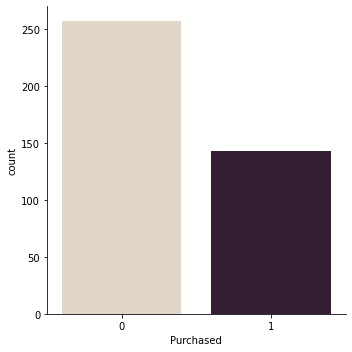

In [17]:
sns.catplot(data=df, x="Purchased",kind="count", palette="ch:.25")

# TAKE A RANDOM SAMPLE OF MALE AND FEMALE

**MALE SAMPLE**

In [18]:
Male=df[df['Gender']=='Male']

In [19]:
Male_sample=Male.sample(n=30,random_state=1)

In [20]:
len(Male_sample)

30

**FEMALE SAMPLE**

In [21]:
Female=df[df['Gender']=='Female']

In [22]:
Female_Sample=Female.sample(n=30,random_state=0)

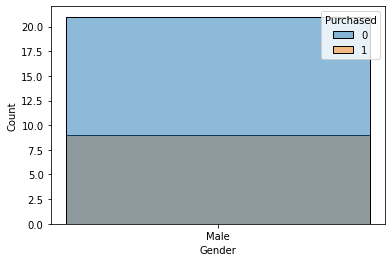

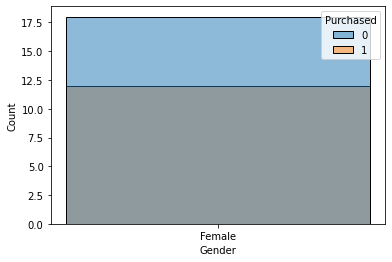

In [23]:
data_frame=[Male_sample,Female_Sample]
for i in data_frame:
    plt.figure()
    #sns.kdeplot(data['Income'],hue=data[i]);
    sns.histplot(data=i,x='Gender',hue='Purchased')

# HYPOTHESIS TESTS

**The proportion of males whose ads were purchased are equal to the proportion of females whose ads were purchased**

Null Hypothesis : Ho: Proportion of Male and Female are equal p1=p2

Alternative Hypothesis: HA: Proportion of Male and Female are not equal p1!=p2

In [24]:
M_S_P=Male_sample[Male_sample['Purchased']==1]
len(M_S_P)

9

In [25]:
F_S_P=Female_Sample[Female_Sample['Purchased']==1]

In [26]:
len(F_S_P)

12

In [27]:
Success=np.array([9,12])
Sample_Size=np.array([30,30])

In [28]:
from statsmodels.stats.proportion import proportions_ztest

In [29]:
z_stat, p_value = proportions_ztest(Success,Sample_Size,alternative='two-sided')

In [30]:

if p_value>0.05:
    print(f'{p_value} Accept Null Hypothesis')
else:
        print('Reject Null Hypothesis')

0.41679281184762673 Accept Null Hypothesis


# **The Proportion of males whose ads were not purchased are equal to the proportion of females whose ads were not purchased**

NULL HYPOTHESIS : HO : PROPORTION OF MALE AND FEMALE ARE EQUAL WHEN ADS NOT SOLD P1=P2

ALTERNATIVE HYPOTHESIS : HA: PROPORTION OF MALE AND FEMALE ARE NOT EQUAL WHEN ADS NOT SOLD P1!=P2

In [31]:
Male_Unpurchased=Male_sample[Male_sample['Purchased']==0]

In [32]:
Female_Unpurchased=Female_Sample[Female_Sample['Purchased']==0]

In [33]:

len(Male_Unpurchased)

21

In [34]:
len(Female_Unpurchased)

18

In [35]:
unsucess=np.array([21,18])
Sample_Size=np.array([30,30])

In [36]:
z_stat, p_value = proportions_ztest(unsucess,Sample_Size,alternative='two-sided')

In [37]:

if p_value>0.05:
    print(f'{p_value} Accept Null Hypothesis')
else:
        print('Reject Null Hypothesis')

0.41679281184762706 Accept Null Hypothesis


# The equality of variances of ages of males and females

HO: VARIANCE OF MALE AND FEMALE ARE EQUAL σ1=σ2

HA: VARIANCE OF MALE AND FEMALE ARE NOT EQUAL σ1!=σ2

In [38]:
x1=Male_sample['Age']
x2=Female_Sample['Age']
X1=np.array(x1)
X2=np.array(x2)

In [39]:
def f_test(x, y):
    
    f = np.var(X1, ddof=1)/np.var(X2, ddof=1)
    dfn = X1.size-1 
    dfd = X2.size-1
    p = 1-stats.f.cdf(f, dfn, dfd)
    if p>0.05:
        print(f'The value of p is {p}, So we will accept Null Hypothesis')
    else:
        print(f'The value of p is {p}, So we will reject Null Hypothesis')



#perform F-test
f_test(X1,X2)


The value of p is 0.5971055249595009, So we will accept Null Hypothesis


**Based on the results of ‘c’, the equality of means of ages of males and females.**

Variance of both samples are equal so mean of both groups are equal as well

# CONCLUSION

a: There are 95% surety that both male and female equally purchasing ads

b: There are 95% surety that proportion of male and female are equal in terms of not purchasing ads

c: We are 95% sure that variances male and female ages are equal

d: We are 95% sure that means male and female are equal


# SUMMARY

**After Analyzing the campaign we identify that both men and women have same buying behavior**

# TITLE

**STATISTICAL MODELIN**